Plots can be deceptive.

# Initial extraction, aggregation

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("chickens.csv")

# Display the first few instances of the dataset
df.head()

,weight,eggs,age,diet,wk
0,2.600000,0.000000,0.508476,A,1
1,2.803427,2.507034,0.572946,A,1
2,2.806266,2.528363,0.638138,A,1
3,2.821385,2.658041,0.678791,A,1
4,2.844165,2.658121,0.708020,A,1


In [37]:
# Calculate some weight, eggs, and age statistics according to diet
ss_weight = df.groupby(["diet", "weight"])
# ss_weight[['diet', 'weight']].head()

ss_eggs = df.groupby(["diet", "eggs"])
# ss_eggs[['diet', 'eggs']].head()

ss_age = df.groupby(["diet", "age"])
ss_age[['diet', 'age']].head()

,diet,age
0,A,0.508476
1,A,0.572946
2,A,0.638138
3,A,0.678791
4,A,0.708020
...,...,...
295,C,3.394574
296,C,3.411271
297,C,3.431098
298,C,3.438378


# Visualizing

With a histogram. The ages roughly seem to be evenly distributed:

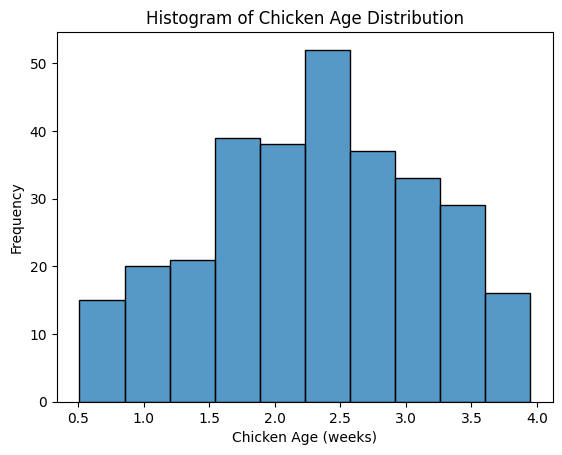

In [20]:
sns.histplot(df['age'], bins='sturges')

plt.title("Histogram of Chicken Age Distribution")
plt.xlabel("Chicken Age (weeks)")
plt.ylabel("Frequency")
plt.show()

With a boxplot

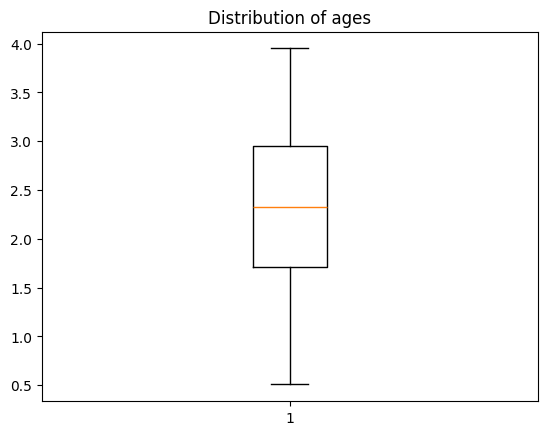

In [22]:
plt.boxplot(df['age'])

plt.title("Distribution of ages")
plt.show()

Let's try different aggregations:

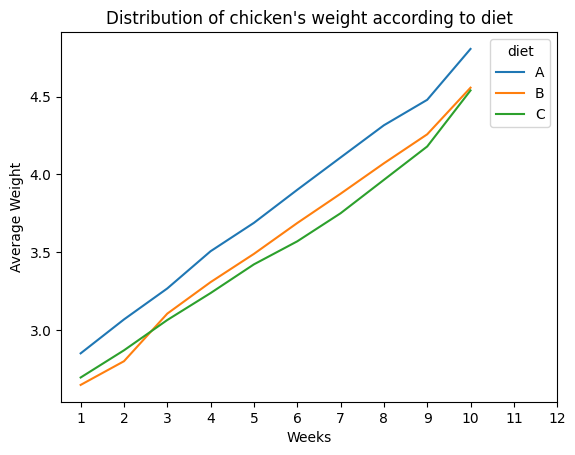

In [32]:
# A. Average weight per diet. Maybe diet A could be having a positive effect...

agg_weights = df.groupby(['wk', 'diet']).weight.mean().reset_index()
agg_weights.columns = ['wk', 'diet', 'avg_weight']

sns.lineplot(data=agg_weights, x='wk', y='avg_weight', hue='diet')

plt.title("Distribution of chicken's weight according to diet")
plt.xlabel("Weeks")
plt.ylabel("Average Weight")

plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

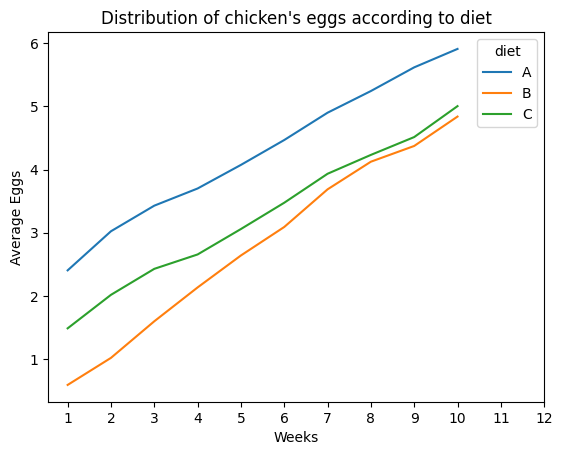

In [33]:
# B. Number of eggs per diet.
# Diet A produces at least at least an egg more per week on average.

# Could be a little too good to be true, though...

agg_eggs = df.groupby(['wk', 'diet']).eggs.mean().reset_index()
agg_eggs.columns = ['wk', 'diet', 'avg_eggs']

sns.lineplot(data=agg_eggs, x='wk', y='avg_eggs', hue='diet')

plt.title("Distribution of chicken's eggs according to diet")
plt.xlabel("Weeks")
plt.ylabel("Average Eggs")

plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

In [36]:
# C. Ages per diet

agg_ages = df.groupby(['diet']).age.mean().reset_index()
agg_ages.columns = ['diet', 'avg_age']
agg_ages

,diet,avg_age
0,A,1.472624
1,B,2.903601
2,C,2.539413


Mean age of group A and group B are significantly different!

Now a scatterplot with eggs, age and diet. As chickens get older, eggs decrease.
The bulk of diet A is also composed of younger chickens.

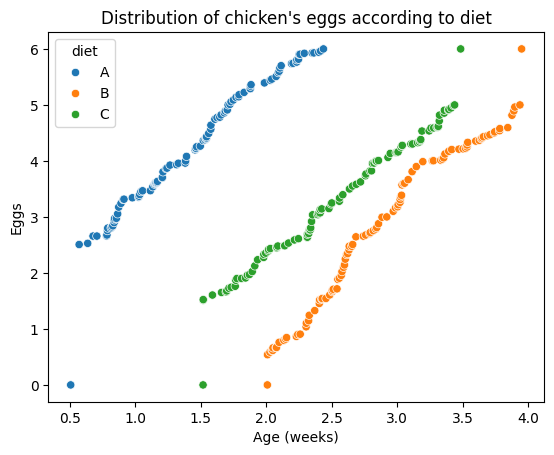

In [41]:
sns.scatterplot(data=df[['age', 'eggs', 'diet']], x='age', y='eggs', hue='diet')

plt.title("Distribution of chicken's eggs according to diet")
plt.xlabel("Age (weeks)")
plt.ylabel("Eggs")

plt.show()

A boxplot of the ages of diet groups. While it's theoretically possible that there's a link between diet and eggs produced, it's inconclusive with this dataset.

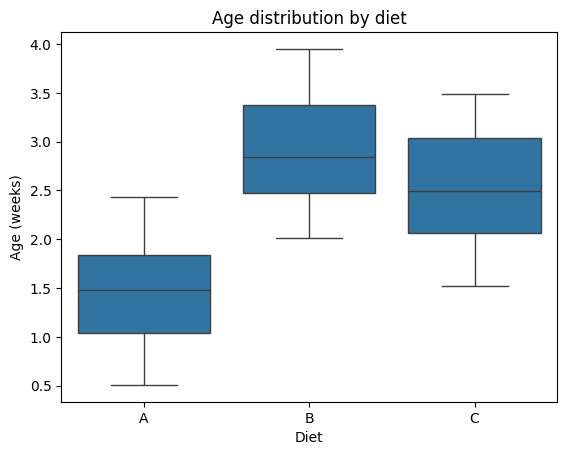

In [42]:
sns.boxplot(data=df, x='diet', y='age')

plt.title("Age distribution by diet")
plt.xlabel("Diet")
plt.ylabel("Age (weeks)")

plt.show()